### TransformerEncoder layers for transforming the ECG to the R-peaks encoding

In [10]:
import pickle
import numpy as np
import torch
from models.models import SimpleTransformerModel
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import fantasia_path, mitbih_path
from customLib.vis import plot_metrics
from customLib.print_model_parameters import print_model_parameters
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.metrics import print_metrics

In [19]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\raw\\downsampled", is_validation_set=True)

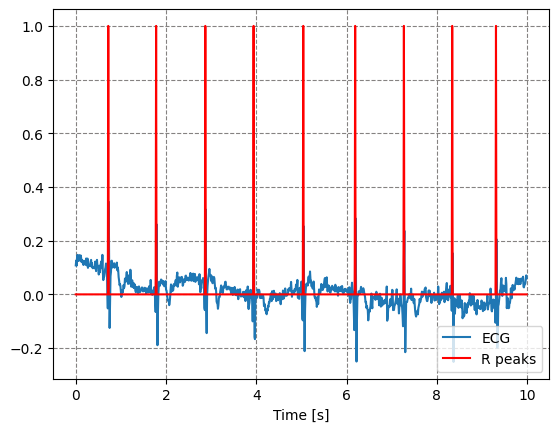

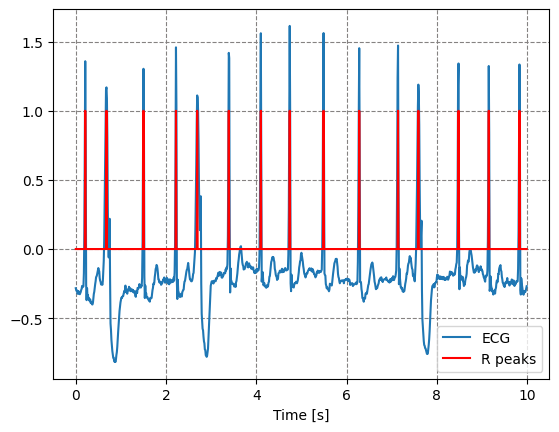

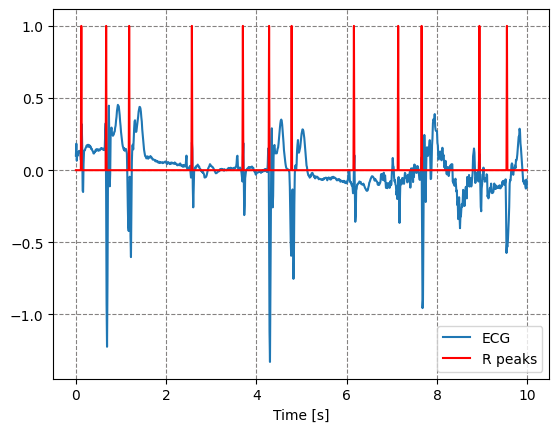

In [20]:
x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

In [23]:
epochs=50
batch_size = 100
input_dim = 32
seq_length = x_train.shape[1]
num_layers = 2
num_heads = 4
dim_feedforward = 32
dropout = 0.2

model = SimpleTransformerModel(input_dim, seq_length, num_layers, num_heads, dim_feedforward, dropout, checkpoint_path="./checkpoints/TNET/raw_ecgs")
# model.load_state_dict(torch.load(".\\checkpoints\\TNET\\raw_ecgs\\\TNET_epoch_50_acc_98.96_f1_0.93.pt"))

Training will be performed with: cuda:0


<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
C:\Users\patry\AppData\Local\Temp\ipykernel_13864\2682576774.py:11: SyntaxWarning: invalid escape sequence '\T'
  model.load_state_dict(torch.load(".\\checkpoints\\TNET\\raw_ecgs\\\TNET_epoch_50_acc_98.96_f1_0.93.pt"))
C:\Users\patry\AppData\Local\Temp\ipykernel_13864\2682576774.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by

<All keys matched successfully>

In [5]:
print_model_parameters(model)

Layer embedding_layer: 4736 parameters
Layer embedding_layer.0: 64 parameters
Layer embedding_layer.2: 1568 parameters
Layer embedding_layer.4: 3104 parameters
Layer encoder_layer: 6464 parameters
Layer encoder_layer.self_attn: 4224 parameters
Layer encoder_layer.self_attn.out_proj: 1056 parameters
Layer encoder_layer.linear1: 1056 parameters
Layer encoder_layer.linear2: 1056 parameters
Layer encoder_layer.norm1: 64 parameters
Layer encoder_layer.norm2: 64 parameters
Layer transformer_encoder: 12928 parameters
Layer transformer_encoder.layers: 12928 parameters
Layer transformer_encoder.layers.0: 6464 parameters
Layer transformer_encoder.layers.0.self_attn: 4224 parameters
Layer transformer_encoder.layers.0.self_attn.out_proj: 1056 parameters
Layer transformer_encoder.layers.0.linear1: 1056 parameters
Layer transformer_encoder.layers.0.linear2: 1056 parameters
Layer transformer_encoder.layers.0.norm1: 64 parameters
Layer transformer_encoder.layers.0.norm2: 64 parameters
Layer transforme

====Epoch [1/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

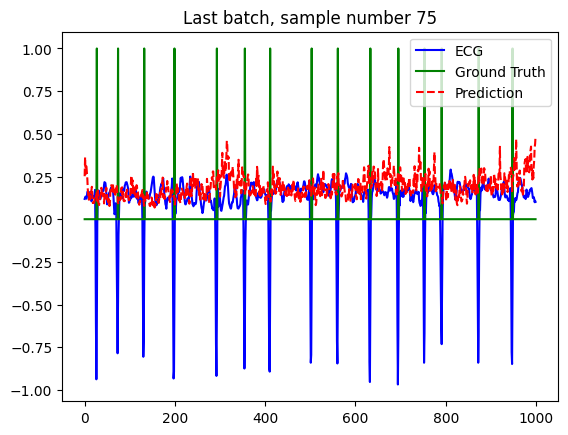

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.6362
train Weighted Accuracy: 0.67395
train F1 Score: 0.18545
train TPR: 0.38321
train FPR: 0.03530
train TNR: 0.96470
train FNR: 0.61679



100%|██████████| 20/20 [00:04<00:00,  4.87it/s]



Validation Loss: 0.4100
validation Weighted Accuracy: 0.50006
validation F1 Score: 0.00024
validation TPR: 0.00012
validation FPR: 0.00000
validation TNR: 1.00000
validation FNR: 0.99988

====Epoch [2/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

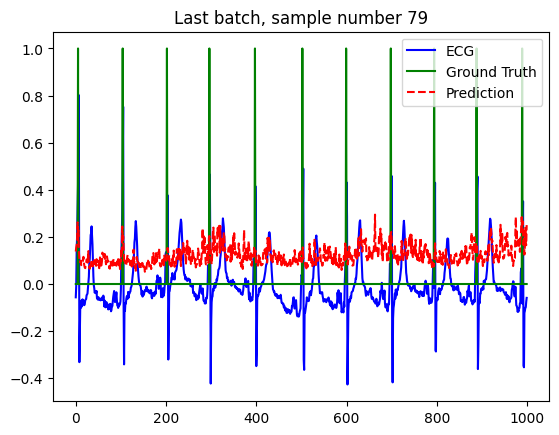

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.3903
train Weighted Accuracy: 0.50100
train F1 Score: 0.00406
train TPR: 0.00204
train FPR: 0.00004
train TNR: 0.99996
train FNR: 0.99796



100%|██████████| 20/20 [00:03<00:00,  5.12it/s]



Validation Loss: 0.3680
validation Weighted Accuracy: 0.50070
validation F1 Score: 0.00280
validation TPR: 0.00140
validation FPR: 0.00000
validation TNR: 1.00000
validation FNR: 0.99860

====Epoch [3/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.10s/it]

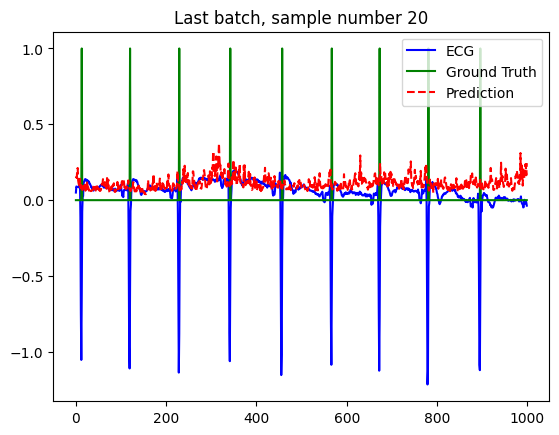

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.3502
train Weighted Accuracy: 0.53632
train F1 Score: 0.13370
train TPR: 0.07285
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.92715



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.3182
validation Weighted Accuracy: 0.59449
validation F1 Score: 0.31412
validation TPR: 0.18917
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.81083

====Epoch [4/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.35s/it]

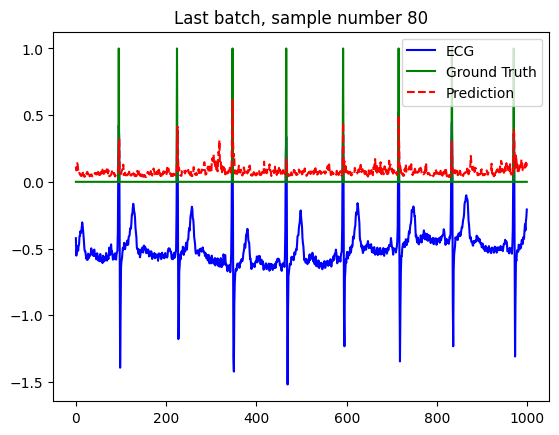

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.3023
train Weighted Accuracy: 0.66485
train F1 Score: 0.48052
train TPR: 0.33026
train FPR: 0.00057
train TNR: 0.99943
train FNR: 0.66974



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.2778
validation Weighted Accuracy: 0.71269
validation F1 Score: 0.58692
validation TPR: 0.42569
validation FPR: 0.00032
validation TNR: 0.99968
validation FNR: 0.57431

====Epoch [5/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.11s/it]

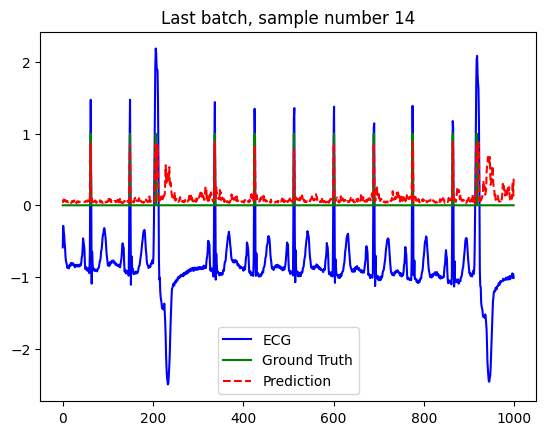

100%|██████████| 119/119 [02:13<00:00,  1.13s/it]



Train Loss: 0.2676
train Weighted Accuracy: 0.74041
train F1 Score: 0.62995
train TPR: 0.48143
train FPR: 0.00060
train TNR: 0.99940
train FNR: 0.51857



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.2469
validation Weighted Accuracy: 0.76329
validation F1 Score: 0.67784
validation TPR: 0.52694
validation FPR: 0.00036
validation TNR: 0.99964
validation FNR: 0.47306

====Epoch [6/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

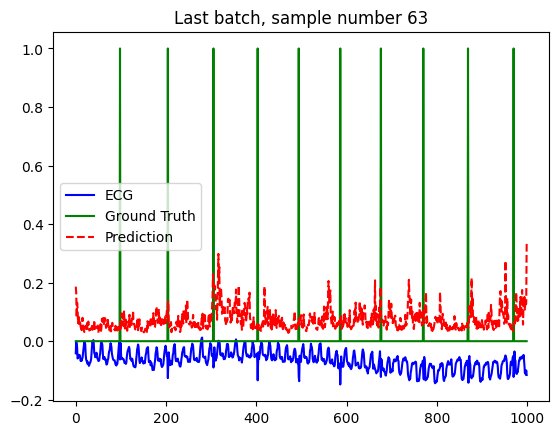

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.2343
train Weighted Accuracy: 0.79832
train F1 Score: 0.71592
train TPR: 0.59756
train FPR: 0.00092
train TNR: 0.99908
train FNR: 0.40244



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]



Validation Loss: 0.2105
validation Weighted Accuracy: 0.82237
validation F1 Score: 0.75741
validation TPR: 0.64549
validation FPR: 0.00075
validation TNR: 0.99925
validation FNR: 0.35451

====Epoch [7/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

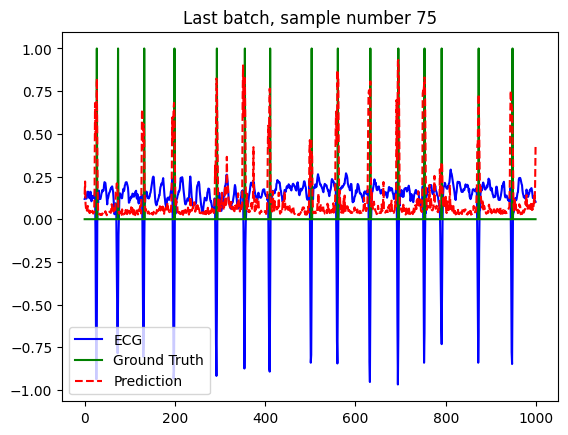

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.2012
train Weighted Accuracy: 0.86077
train F1 Score: 0.78619
train TPR: 0.72303
train FPR: 0.00149
train TNR: 0.99851
train FNR: 0.27697



100%|██████████| 20/20 [00:03<00:00,  5.04it/s]



Validation Loss: 0.1818
validation Weighted Accuracy: 0.87443
validation F1 Score: 0.81611
validation TPR: 0.74998
validation FPR: 0.00112
validation TNR: 0.99888
validation FNR: 0.25002

====Epoch [8/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

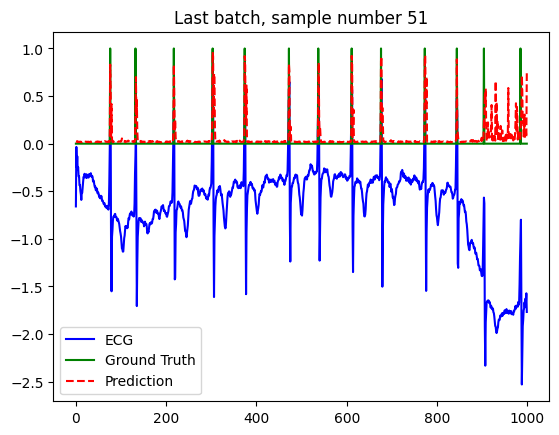

100%|██████████| 119/119 [02:13<00:00,  1.13s/it]



Train Loss: 0.1763
train Weighted Accuracy: 0.89973
train F1 Score: 0.82431
train TPR: 0.80129
train FPR: 0.00183
train TNR: 0.99817
train FNR: 0.19871



100%|██████████| 20/20 [00:03<00:00,  5.01it/s]



Validation Loss: 0.1593
validation Weighted Accuracy: 0.90802
validation F1 Score: 0.84717
validation TPR: 0.81748
validation FPR: 0.00144
validation TNR: 0.99856
validation FNR: 0.18252

====Epoch [9/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

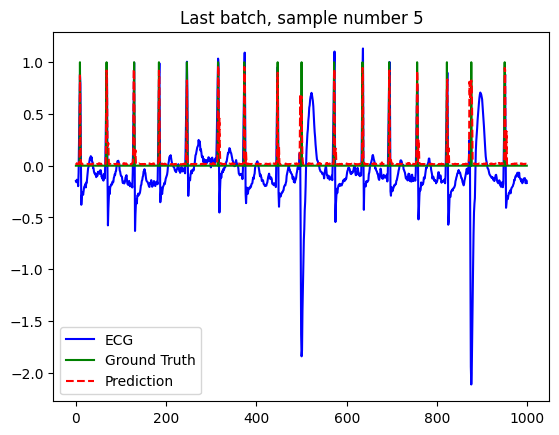

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.1558
train Weighted Accuracy: 0.92772
train F1 Score: 0.85076
train TPR: 0.85748
train FPR: 0.00203
train TNR: 0.99797
train FNR: 0.14252



100%|██████████| 20/20 [00:04<00:00,  4.90it/s]



Validation Loss: 0.1407
validation Weighted Accuracy: 0.93309
validation F1 Score: 0.87418
validation TPR: 0.86768
validation FPR: 0.00150
validation TNR: 0.99850
validation FNR: 0.13232

====Epoch [10/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.08s/it]

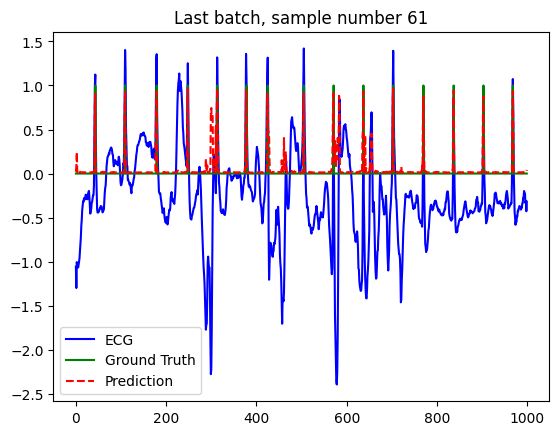

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.1403
train Weighted Accuracy: 0.94814
train F1 Score: 0.87174
train TPR: 0.89838
train FPR: 0.00209
train TNR: 0.99791
train FNR: 0.10162



100%|██████████| 20/20 [00:04<00:00,  4.49it/s]



Validation Loss: 0.1278
validation Weighted Accuracy: 0.94928
validation F1 Score: 0.89457
validation TPR: 0.89999
validation FPR: 0.00143
validation TNR: 0.99857
validation FNR: 0.10001

====Epoch [11/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.14s/it]

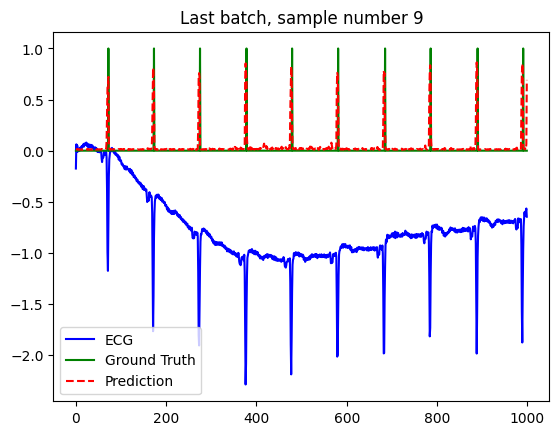

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.1297
train Weighted Accuracy: 0.96151
train F1 Score: 0.88468
train TPR: 0.92516
train FPR: 0.00214
train TNR: 0.99786
train FNR: 0.07484



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.1195
validation Weighted Accuracy: 0.96294
validation F1 Score: 0.90699
validation TPR: 0.92738
validation FPR: 0.00150
validation TNR: 0.99850
validation FNR: 0.07262

====Epoch [12/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.08s/it]

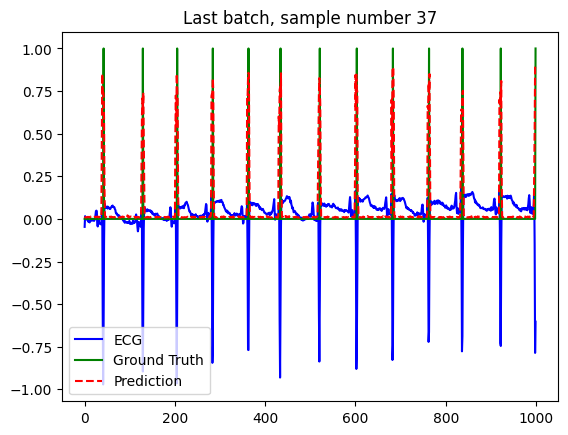

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.1227
train Weighted Accuracy: 0.96913
train F1 Score: 0.89280
train TPR: 0.94039
train FPR: 0.00213
train TNR: 0.99787
train FNR: 0.05961



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.1142
validation Weighted Accuracy: 0.96957
validation F1 Score: 0.91303
validation TPR: 0.94067
validation FPR: 0.00153
validation TNR: 0.99847
validation FNR: 0.05933

====Epoch [13/50]====


 99%|█████████▉| 118/119 [02:34<00:01,  1.09s/it]

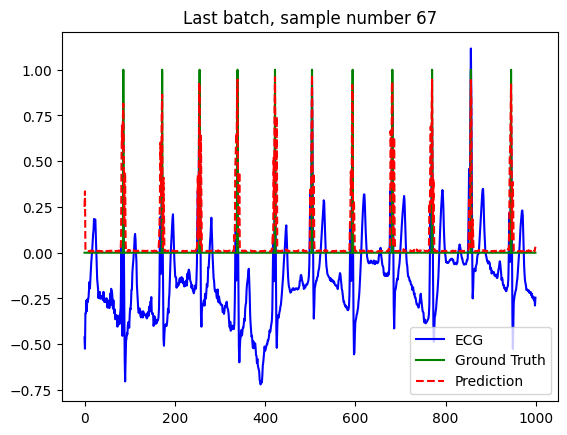

100%|██████████| 119/119 [02:36<00:00,  1.31s/it]



Train Loss: 0.1178
train Weighted Accuracy: 0.97342
train F1 Score: 0.89808
train TPR: 0.94896
train FPR: 0.00211
train TNR: 0.99789
train FNR: 0.05104



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]



Validation Loss: 0.1102
validation Weighted Accuracy: 0.97388
validation F1 Score: 0.91655
validation TPR: 0.94932
validation FPR: 0.00156
validation TNR: 0.99844
validation FNR: 0.05068

====Epoch [14/50]====


 99%|█████████▉| 118/119 [02:24<00:01,  1.08s/it]

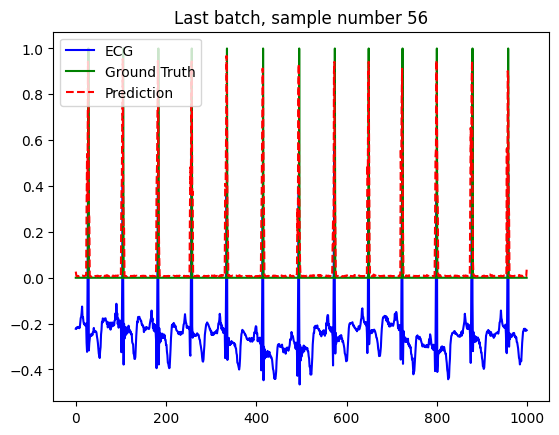

100%|██████████| 119/119 [02:25<00:00,  1.22s/it]



Train Loss: 0.1139
train Weighted Accuracy: 0.97596
train F1 Score: 0.90105
train TPR: 0.95403
train FPR: 0.00210
train TNR: 0.99790
train FNR: 0.04597



100%|██████████| 20/20 [00:04<00:00,  4.86it/s]



Validation Loss: 0.1072
validation Weighted Accuracy: 0.97634
validation F1 Score: 0.91913
validation TPR: 0.95424
validation FPR: 0.00156
validation TNR: 0.99844
validation FNR: 0.04576

====Epoch [15/50]====


 99%|█████████▉| 118/119 [02:29<00:01,  1.44s/it]

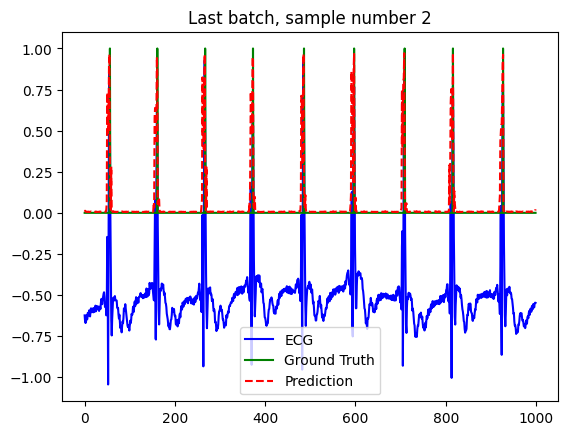

100%|██████████| 119/119 [02:31<00:00,  1.27s/it]



Train Loss: 0.1107
train Weighted Accuracy: 0.97754
train F1 Score: 0.90465
train TPR: 0.95712
train FPR: 0.00204
train TNR: 0.99796
train FNR: 0.04288



100%|██████████| 20/20 [00:04<00:00,  4.98it/s]



Validation Loss: 0.1047
validation Weighted Accuracy: 0.97841
validation F1 Score: 0.92047
validation TPR: 0.95840
validation FPR: 0.00158
validation TNR: 0.99842
validation FNR: 0.04160

====Epoch [16/50]====


 99%|█████████▉| 118/119 [02:36<00:01,  1.08s/it]

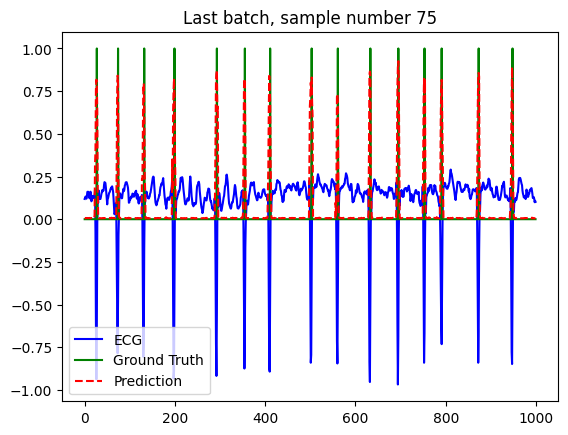

100%|██████████| 119/119 [02:37<00:00,  1.33s/it]



Train Loss: 0.1081
train Weighted Accuracy: 0.97863
train F1 Score: 0.90623
train TPR: 0.95928
train FPR: 0.00203
train TNR: 0.99797
train FNR: 0.04072



100%|██████████| 20/20 [00:05<00:00,  3.86it/s]



Validation Loss: 0.1028
validation Weighted Accuracy: 0.97936
validation F1 Score: 0.92102
validation TPR: 0.96033
validation FPR: 0.00160
validation TNR: 0.99840
validation FNR: 0.03967

====Epoch [17/50]====


 99%|█████████▉| 118/119 [02:14<00:01,  1.25s/it]

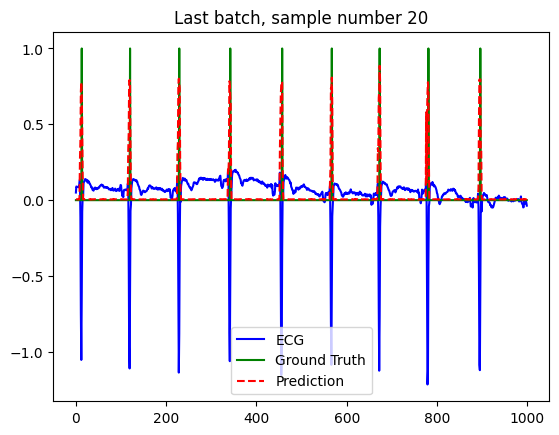

100%|██████████| 119/119 [02:16<00:00,  1.14s/it]



Train Loss: 0.1062
train Weighted Accuracy: 0.97948
train F1 Score: 0.90848
train TPR: 0.96095
train FPR: 0.00198
train TNR: 0.99802
train FNR: 0.03905



100%|██████████| 20/20 [00:05<00:00,  3.80it/s]



Validation Loss: 0.1012
validation Weighted Accuracy: 0.97981
validation F1 Score: 0.92335
validation TPR: 0.96117
validation FPR: 0.00154
validation TNR: 0.99846
validation FNR: 0.03883

====Epoch [18/50]====


 99%|█████████▉| 118/119 [02:38<00:01,  1.08s/it]

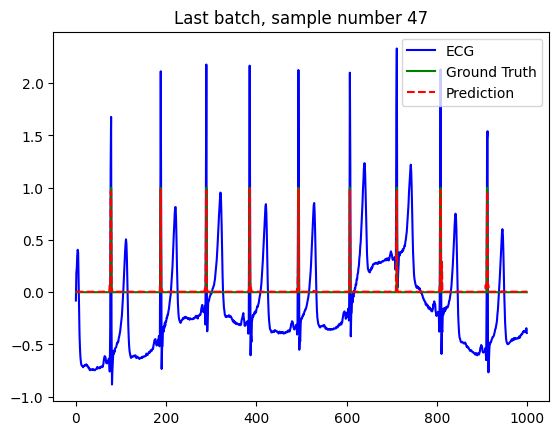

100%|██████████| 119/119 [02:39<00:00,  1.34s/it]



Train Loss: 0.1042
train Weighted Accuracy: 0.98021
train F1 Score: 0.90986
train TPR: 0.96238
train FPR: 0.00197
train TNR: 0.99803
train FNR: 0.03762



100%|██████████| 20/20 [00:07<00:00,  2.80it/s]



Validation Loss: 0.0997
validation Weighted Accuracy: 0.98106
validation F1 Score: 0.92371
validation TPR: 0.96369
validation FPR: 0.00157
validation TNR: 0.99843
validation FNR: 0.03631

====Epoch [19/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.29s/it]

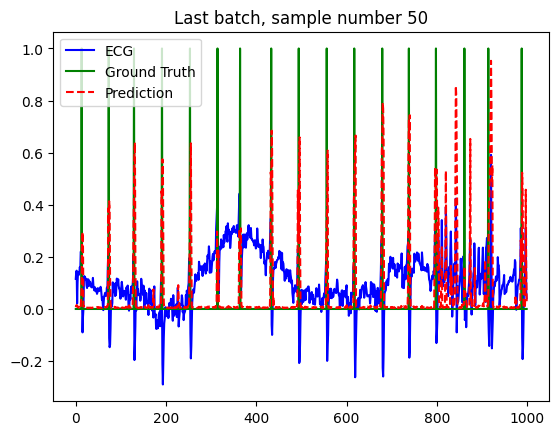

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1025
train Weighted Accuracy: 0.98114
train F1 Score: 0.91152
train TPR: 0.96423
train FPR: 0.00194
train TNR: 0.99806
train FNR: 0.03577



100%|██████████| 20/20 [00:04<00:00,  4.97it/s]



Validation Loss: 0.0985
validation Weighted Accuracy: 0.98164
validation F1 Score: 0.92406
validation TPR: 0.96485
validation FPR: 0.00158
validation TNR: 0.99842
validation FNR: 0.03515

====Epoch [20/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.09s/it]

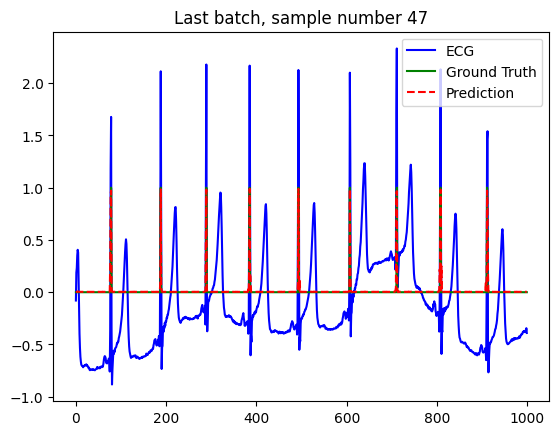

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.1011
train Weighted Accuracy: 0.98181
train F1 Score: 0.91246
train TPR: 0.96555
train FPR: 0.00194
train TNR: 0.99806
train FNR: 0.03445



100%|██████████| 20/20 [00:03<00:00,  5.00it/s]



Validation Loss: 0.0974
validation Weighted Accuracy: 0.98266
validation F1 Score: 0.92398
validation TPR: 0.96693
validation FPR: 0.00161
validation TNR: 0.99839
validation FNR: 0.03307

====Epoch [21/50]====


 99%|█████████▉| 118/119 [02:21<00:01,  1.08s/it]

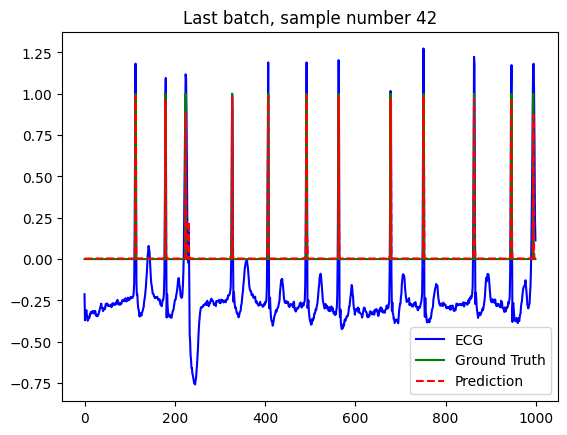

100%|██████████| 119/119 [02:22<00:00,  1.20s/it]



Train Loss: 0.0998
train Weighted Accuracy: 0.98237
train F1 Score: 0.91433
train TPR: 0.96665
train FPR: 0.00190
train TNR: 0.99810
train FNR: 0.03335



100%|██████████| 20/20 [00:04<00:00,  4.91it/s]



Validation Loss: 0.0963
validation Weighted Accuracy: 0.98320
validation F1 Score: 0.92434
validation TPR: 0.96801
validation FPR: 0.00162
validation TNR: 0.99838
validation FNR: 0.03199

====Epoch [22/50]====


 99%|█████████▉| 118/119 [02:26<00:01,  1.44s/it]

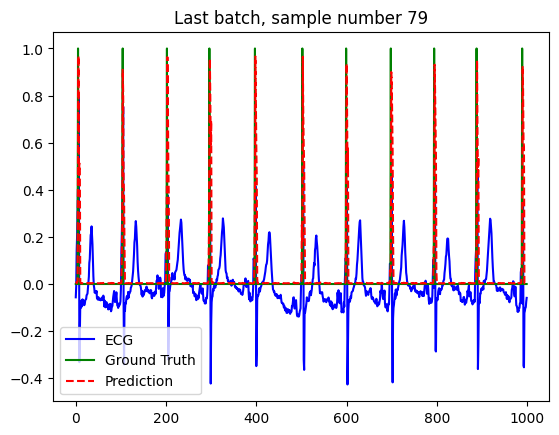

100%|██████████| 119/119 [02:28<00:00,  1.25s/it]



Train Loss: 0.0985
train Weighted Accuracy: 0.98310
train F1 Score: 0.91516
train TPR: 0.96809
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.03191



100%|██████████| 20/20 [00:03<00:00,  5.01it/s]



Validation Loss: 0.0954
validation Weighted Accuracy: 0.98381
validation F1 Score: 0.92428
validation TPR: 0.96925
validation FPR: 0.00164
validation TNR: 0.99836
validation FNR: 0.03075

====Epoch [23/50]====


 99%|█████████▉| 118/119 [02:31<00:01,  1.08s/it]

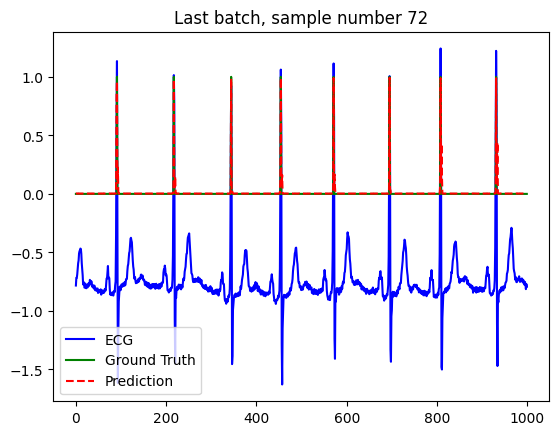

100%|██████████| 119/119 [02:33<00:00,  1.29s/it]



Train Loss: 0.0974
train Weighted Accuracy: 0.98356
train F1 Score: 0.91592
train TPR: 0.96900
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.03100



100%|██████████| 20/20 [00:04<00:00,  4.89it/s]



Validation Loss: 0.0945
validation Weighted Accuracy: 0.98413
validation F1 Score: 0.92455
validation TPR: 0.96989
validation FPR: 0.00164
validation TNR: 0.99836
validation FNR: 0.03011

====Epoch [24/50]====


 99%|█████████▉| 118/119 [02:15<00:01,  1.44s/it]

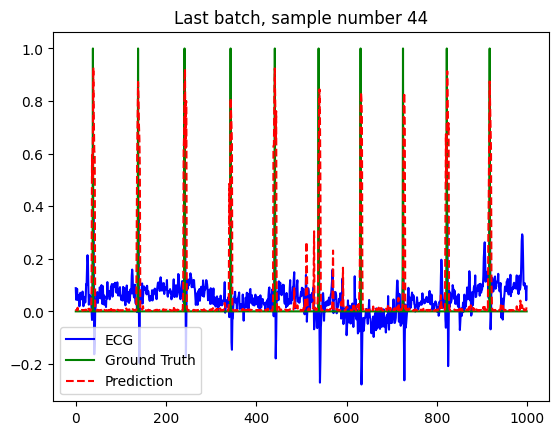

100%|██████████| 119/119 [02:16<00:00,  1.15s/it]



Train Loss: 0.0964
train Weighted Accuracy: 0.98393
train F1 Score: 0.91631
train TPR: 0.96975
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.03025



100%|██████████| 20/20 [00:04<00:00,  4.95it/s]



Validation Loss: 0.0937
validation Weighted Accuracy: 0.98487
validation F1 Score: 0.92394
validation TPR: 0.97141
validation FPR: 0.00168
validation TNR: 0.99832
validation FNR: 0.02859

====Epoch [25/50]====


 99%|█████████▉| 118/119 [02:31<00:01,  1.08s/it]

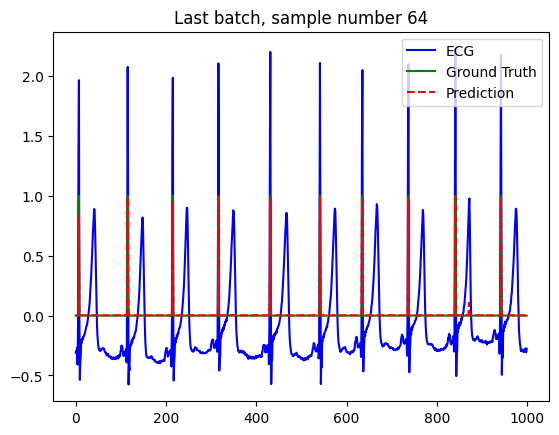

100%|██████████| 119/119 [02:32<00:00,  1.28s/it]



Train Loss: 0.0954
train Weighted Accuracy: 0.98434
train F1 Score: 0.91661
train TPR: 0.97058
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.02942



100%|██████████| 20/20 [00:05<00:00,  3.56it/s]



Validation Loss: 0.0930
validation Weighted Accuracy: 0.98515
validation F1 Score: 0.92324
validation TPR: 0.97202
validation FPR: 0.00171
validation TNR: 0.99829
validation FNR: 0.02798

====Epoch [26/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.23s/it]

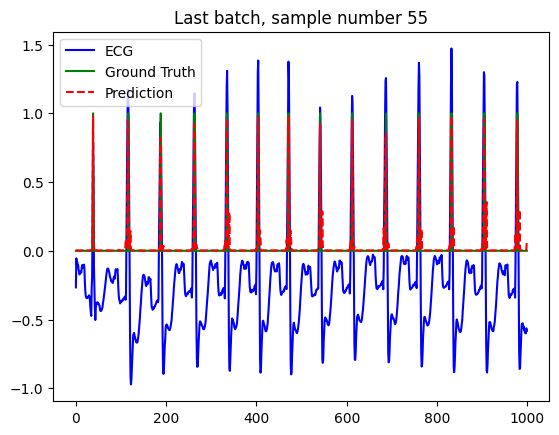

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0945
train Weighted Accuracy: 0.98498
train F1 Score: 0.91789
train TPR: 0.97182
train FPR: 0.00187
train TNR: 0.99813
train FNR: 0.02818



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0923
validation Weighted Accuracy: 0.98518
validation F1 Score: 0.92339
validation TPR: 0.97206
validation FPR: 0.00170
validation TNR: 0.99830
validation FNR: 0.02794

====Epoch [27/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.08s/it]

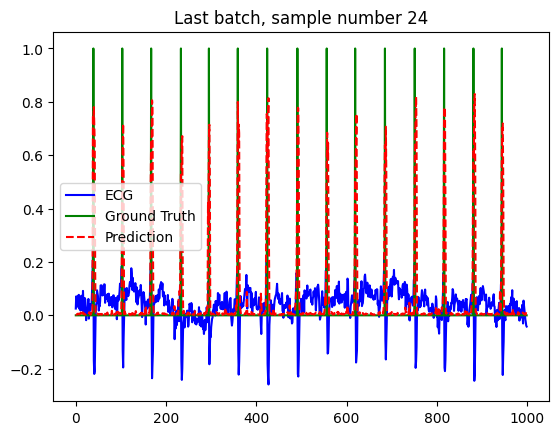

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0938
train Weighted Accuracy: 0.98517
train F1 Score: 0.91800
train TPR: 0.97220
train FPR: 0.00187
train TNR: 0.99813
train FNR: 0.02780



100%|██████████| 20/20 [00:05<00:00,  3.62it/s]



Validation Loss: 0.0916
validation Weighted Accuracy: 0.98618
validation F1 Score: 0.92325
validation TPR: 0.97410
validation FPR: 0.00174
validation TNR: 0.99826
validation FNR: 0.02590

====Epoch [28/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

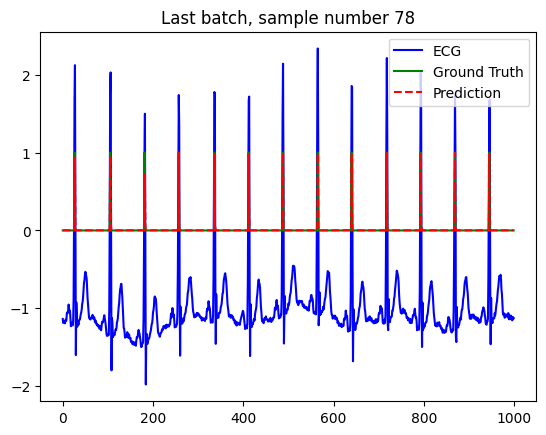

100%|██████████| 119/119 [02:09<00:00,  1.09s/it]



Train Loss: 0.0929
train Weighted Accuracy: 0.98545
train F1 Score: 0.91897
train TPR: 0.97275
train FPR: 0.00185
train TNR: 0.99815
train FNR: 0.02725



100%|██████████| 20/20 [00:04<00:00,  5.00it/s]



Validation Loss: 0.0911
validation Weighted Accuracy: 0.98654
validation F1 Score: 0.92214
validation TPR: 0.97486
validation FPR: 0.00178
validation TNR: 0.99822
validation FNR: 0.02514

====Epoch [29/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.08s/it]

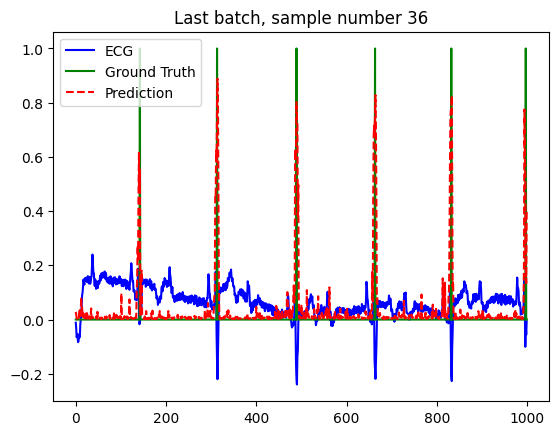

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0922
train Weighted Accuracy: 0.98589
train F1 Score: 0.91891
train TPR: 0.97364
train FPR: 0.00187
train TNR: 0.99813
train FNR: 0.02636



100%|██████████| 20/20 [00:05<00:00,  3.56it/s]



Validation Loss: 0.0905
validation Weighted Accuracy: 0.98712
validation F1 Score: 0.92125
validation TPR: 0.97606
validation FPR: 0.00183
validation TNR: 0.99817
validation FNR: 0.02394

====Epoch [30/50]====


 99%|█████████▉| 118/119 [02:12<00:01,  1.32s/it]

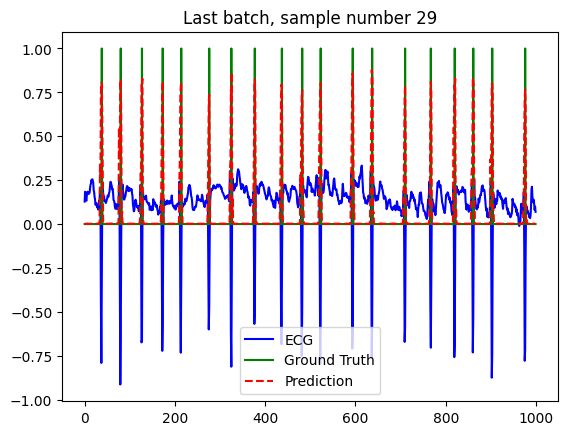

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.0915
train Weighted Accuracy: 0.98582
train F1 Score: 0.91944
train TPR: 0.97349
train FPR: 0.00185
train TNR: 0.99815
train FNR: 0.02651



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0899
validation Weighted Accuracy: 0.98752
validation F1 Score: 0.92192
validation TPR: 0.97686
validation FPR: 0.00182
validation TNR: 0.99818
validation FNR: 0.02314

====Epoch [31/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.09s/it]

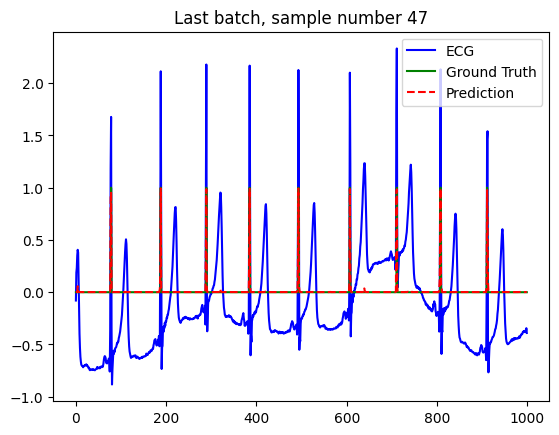

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0909
train Weighted Accuracy: 0.98635
train F1 Score: 0.92026
train TPR: 0.97454
train FPR: 0.00184
train TNR: 0.99816
train FNR: 0.02546



100%|██████████| 20/20 [00:04<00:00,  4.95it/s]



Validation Loss: 0.0893
validation Weighted Accuracy: 0.98767
validation F1 Score: 0.92149
validation TPR: 0.97718
validation FPR: 0.00184
validation TNR: 0.99816
validation FNR: 0.02282

====Epoch [32/50]====


 99%|█████████▉| 118/119 [02:19<00:01,  1.08s/it]

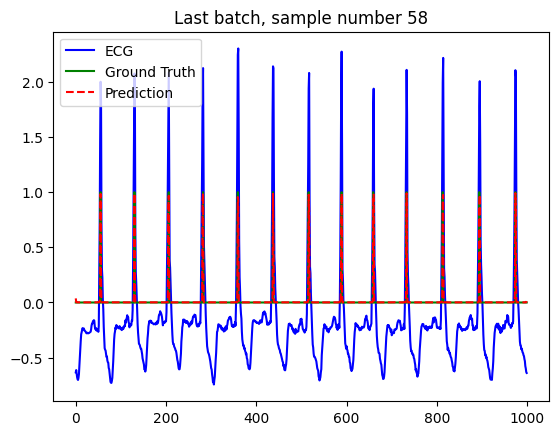

100%|██████████| 119/119 [02:20<00:00,  1.18s/it]



Train Loss: 0.0901
train Weighted Accuracy: 0.98656
train F1 Score: 0.92039
train TPR: 0.97496
train FPR: 0.00184
train TNR: 0.99816
train FNR: 0.02504



100%|██████████| 20/20 [00:04<00:00,  4.99it/s]



Validation Loss: 0.0887
validation Weighted Accuracy: 0.98743
validation F1 Score: 0.92123
validation TPR: 0.97670
validation FPR: 0.00184
validation TNR: 0.99816
validation FNR: 0.02330

====Epoch [33/50]====


 99%|█████████▉| 118/119 [02:28<00:01,  1.44s/it]

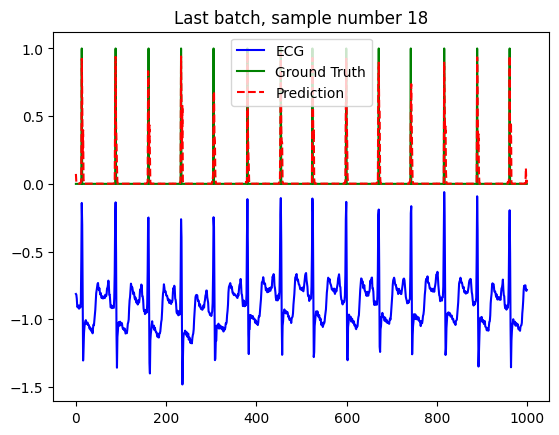

100%|██████████| 119/119 [02:29<00:00,  1.26s/it]



Train Loss: 0.0895
train Weighted Accuracy: 0.98668
train F1 Score: 0.92075
train TPR: 0.97520
train FPR: 0.00184
train TNR: 0.99816
train FNR: 0.02480



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]



Validation Loss: 0.0882
validation Weighted Accuracy: 0.98786
validation F1 Score: 0.92116
validation TPR: 0.97758
validation FPR: 0.00185
validation TNR: 0.99815
validation FNR: 0.02242

====Epoch [34/50]====


 99%|█████████▉| 118/119 [02:32<00:01,  1.08s/it]

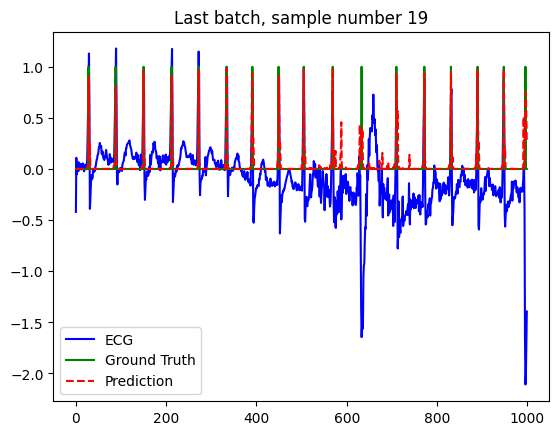

100%|██████████| 119/119 [02:33<00:00,  1.29s/it]



Train Loss: 0.0889
train Weighted Accuracy: 0.98695
train F1 Score: 0.92126
train TPR: 0.97573
train FPR: 0.00183
train TNR: 0.99817
train FNR: 0.02427



100%|██████████| 20/20 [00:03<00:00,  5.02it/s]



Validation Loss: 0.0877
validation Weighted Accuracy: 0.98791
validation F1 Score: 0.92132
validation TPR: 0.97766
validation FPR: 0.00185
validation TNR: 0.99815
validation FNR: 0.02234

====Epoch [35/50]====


 99%|█████████▉| 118/119 [02:15<00:01,  1.44s/it]

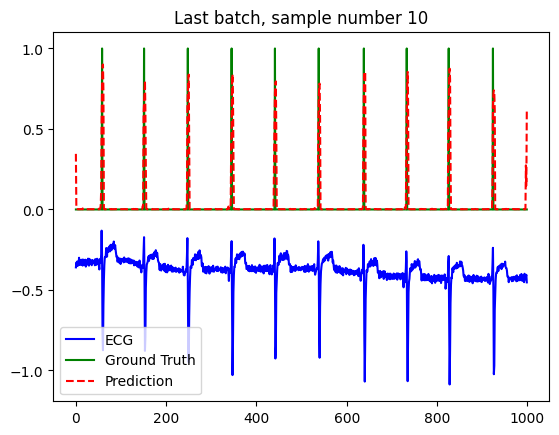

100%|██████████| 119/119 [02:16<00:00,  1.15s/it]



Train Loss: 0.0884
train Weighted Accuracy: 0.98713
train F1 Score: 0.92182
train TPR: 0.97607
train FPR: 0.00182
train TNR: 0.99818
train FNR: 0.02393



100%|██████████| 20/20 [00:04<00:00,  4.87it/s]



Validation Loss: 0.0872
validation Weighted Accuracy: 0.98850
validation F1 Score: 0.92172
validation TPR: 0.97886
validation FPR: 0.00185
validation TNR: 0.99815
validation FNR: 0.02114

====Epoch [36/50]====


 99%|█████████▉| 118/119 [02:31<00:01,  1.08s/it]

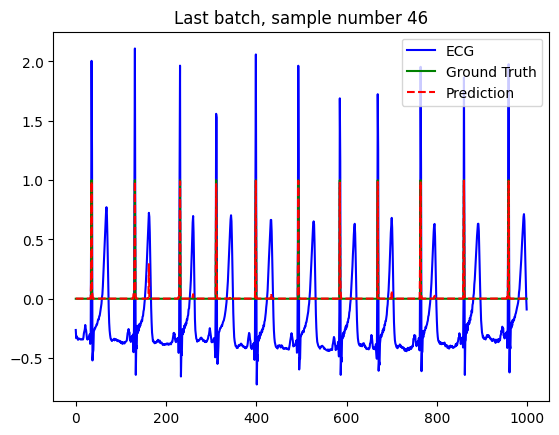

100%|██████████| 119/119 [02:32<00:00,  1.29s/it]



Train Loss: 0.0878
train Weighted Accuracy: 0.98736
train F1 Score: 0.92261
train TPR: 0.97653
train FPR: 0.00180
train TNR: 0.99820
train FNR: 0.02347



100%|██████████| 20/20 [00:05<00:00,  3.58it/s]



Validation Loss: 0.0867
validation Weighted Accuracy: 0.98843
validation F1 Score: 0.92240
validation TPR: 0.97870
validation FPR: 0.00183
validation TNR: 0.99817
validation FNR: 0.02130

====Epoch [37/50]====


 99%|█████████▉| 118/119 [02:10<00:01,  1.33s/it]

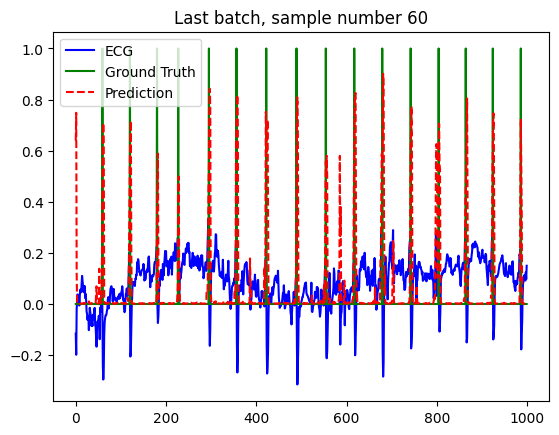

100%|██████████| 119/119 [02:11<00:00,  1.11s/it]



Train Loss: 0.0873
train Weighted Accuracy: 0.98742
train F1 Score: 0.92285
train TPR: 0.97664
train FPR: 0.00180
train TNR: 0.99820
train FNR: 0.02336



100%|██████████| 20/20 [00:03<00:00,  5.01it/s]



Validation Loss: 0.0862
validation Weighted Accuracy: 0.98892
validation F1 Score: 0.92176
validation TPR: 0.97970
validation FPR: 0.00187
validation TNR: 0.99813
validation FNR: 0.02030

====Epoch [38/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.08s/it]

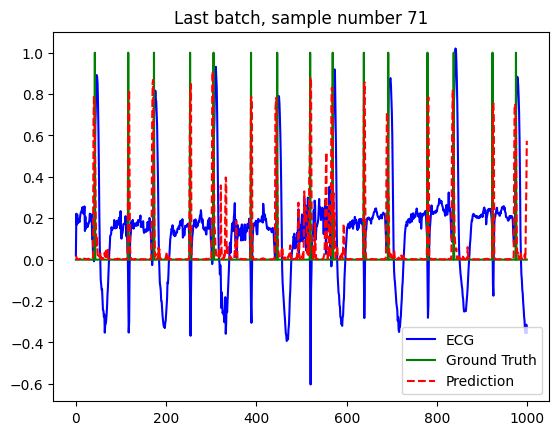

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0866
train Weighted Accuracy: 0.98759
train F1 Score: 0.92355
train TPR: 0.97696
train FPR: 0.00178
train TNR: 0.99822
train FNR: 0.02304



100%|██████████| 20/20 [00:05<00:00,  3.62it/s]



Validation Loss: 0.0857
validation Weighted Accuracy: 0.98883
validation F1 Score: 0.92276
validation TPR: 0.97950
validation FPR: 0.00183
validation TNR: 0.99817
validation FNR: 0.02050

====Epoch [39/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.08s/it]

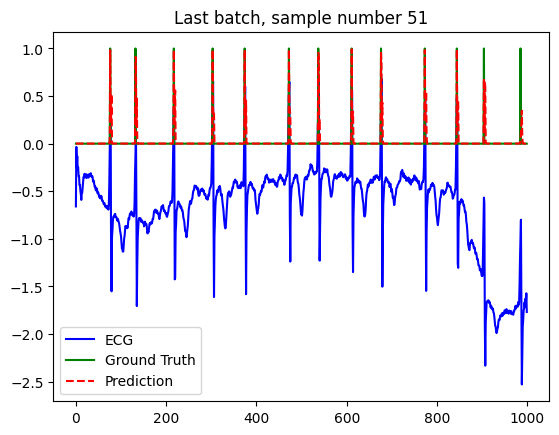

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.0861
train Weighted Accuracy: 0.98786
train F1 Score: 0.92487
train TPR: 0.97747
train FPR: 0.00175
train TNR: 0.99825
train FNR: 0.02253



100%|██████████| 20/20 [00:04<00:00,  4.85it/s]



Validation Loss: 0.0852
validation Weighted Accuracy: 0.98875
validation F1 Score: 0.92395
validation TPR: 0.97930
validation FPR: 0.00180
validation TNR: 0.99820
validation FNR: 0.02070

====Epoch [40/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.08s/it]

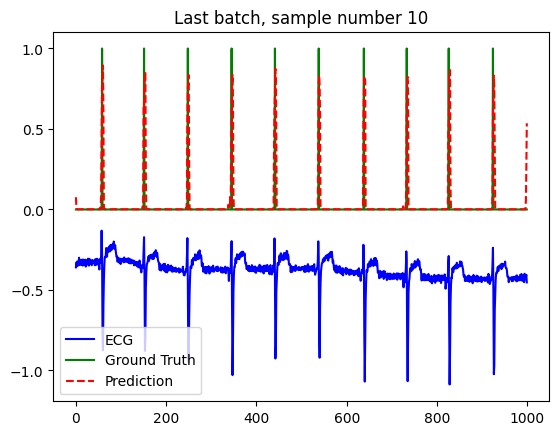

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0855
train Weighted Accuracy: 0.98786
train F1 Score: 0.92499
train TPR: 0.97746
train FPR: 0.00175
train TNR: 0.99825
train FNR: 0.02254



100%|██████████| 20/20 [00:05<00:00,  3.58it/s]



Validation Loss: 0.0847
validation Weighted Accuracy: 0.98923
validation F1 Score: 0.92414
validation TPR: 0.98026
validation FPR: 0.00180
validation TNR: 0.99820
validation FNR: 0.01974

====Epoch [41/50]====


 99%|█████████▉| 118/119 [02:11<00:01,  1.31s/it]

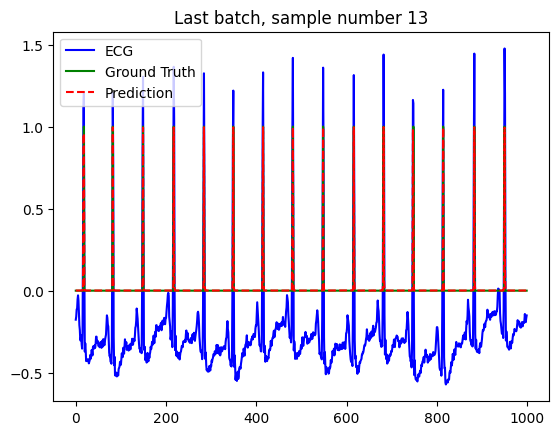

100%|██████████| 119/119 [02:13<00:00,  1.12s/it]



Train Loss: 0.0848
train Weighted Accuracy: 0.98820
train F1 Score: 0.92562
train TPR: 0.97815
train FPR: 0.00174
train TNR: 0.99826
train FNR: 0.02185



100%|██████████| 20/20 [00:04<00:00,  4.87it/s]



Validation Loss: 0.0842
validation Weighted Accuracy: 0.98940
validation F1 Score: 0.92482
validation TPR: 0.98058
validation FPR: 0.00179
validation TNR: 0.99821
validation FNR: 0.01942

====Epoch [42/50]====


 99%|█████████▉| 118/119 [02:33<00:01,  1.11s/it]

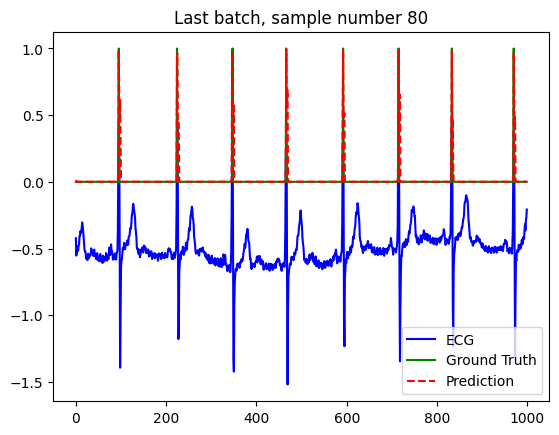

100%|██████████| 119/119 [02:34<00:00,  1.30s/it]



Train Loss: 0.0844
train Weighted Accuracy: 0.98828
train F1 Score: 0.92671
train TPR: 0.97827
train FPR: 0.00171
train TNR: 0.99829
train FNR: 0.02173



100%|██████████| 20/20 [00:04<00:00,  4.95it/s]



Validation Loss: 0.0836
validation Weighted Accuracy: 0.98967
validation F1 Score: 0.92612
validation TPR: 0.98110
validation FPR: 0.00176
validation TNR: 0.99824
validation FNR: 0.01890

====Epoch [43/50]====


 99%|█████████▉| 118/119 [02:22<00:01,  1.08s/it]

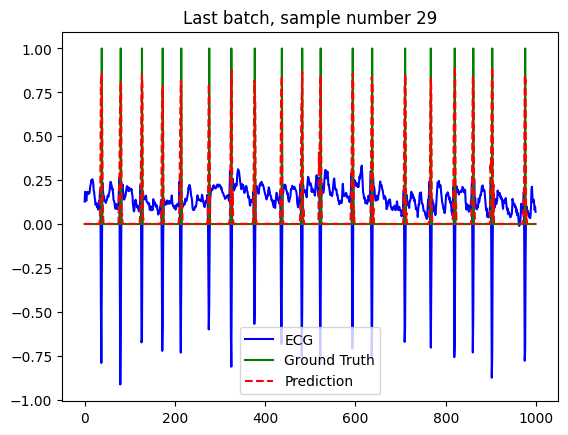

100%|██████████| 119/119 [02:24<00:00,  1.21s/it]



Train Loss: 0.0839
train Weighted Accuracy: 0.98847
train F1 Score: 0.92710
train TPR: 0.97865
train FPR: 0.00170
train TNR: 0.99830
train FNR: 0.02135



100%|██████████| 20/20 [00:04<00:00,  4.99it/s]



Validation Loss: 0.0832
validation Weighted Accuracy: 0.98982
validation F1 Score: 0.92661
validation TPR: 0.98138
validation FPR: 0.00175
validation TNR: 0.99825
validation FNR: 0.01862

====Epoch [44/50]====


 99%|█████████▉| 118/119 [02:24<00:01,  1.44s/it]

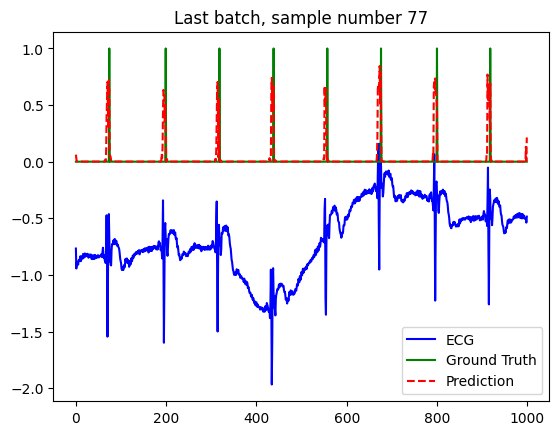

100%|██████████| 119/119 [02:26<00:00,  1.23s/it]



Train Loss: 0.0833
train Weighted Accuracy: 0.98867
train F1 Score: 0.92797
train TPR: 0.97902
train FPR: 0.00168
train TNR: 0.99832
train FNR: 0.02098



100%|██████████| 20/20 [00:04<00:00,  4.84it/s]



Validation Loss: 0.0826
validation Weighted Accuracy: 0.98965
validation F1 Score: 0.92881
validation TPR: 0.98098
validation FPR: 0.00168
validation TNR: 0.99832
validation FNR: 0.01902

====Epoch [45/50]====


 99%|█████████▉| 118/119 [02:52<00:01,  1.07s/it]

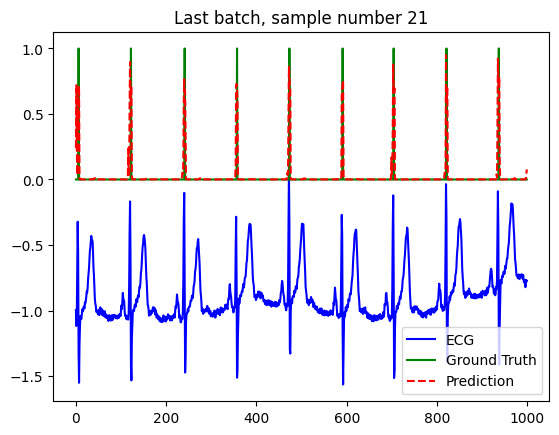

100%|██████████| 119/119 [02:53<00:00,  1.46s/it]



Train Loss: 0.0827
train Weighted Accuracy: 0.98885
train F1 Score: 0.92881
train TPR: 0.97936
train FPR: 0.00166
train TNR: 0.99834
train FNR: 0.02064



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]



Validation Loss: 0.0821
validation Weighted Accuracy: 0.99014
validation F1 Score: 0.92844
validation TPR: 0.98198
validation FPR: 0.00170
validation TNR: 0.99830
validation FNR: 0.01802

====Epoch [46/50]====


 99%|█████████▉| 118/119 [02:13<00:01,  1.44s/it]

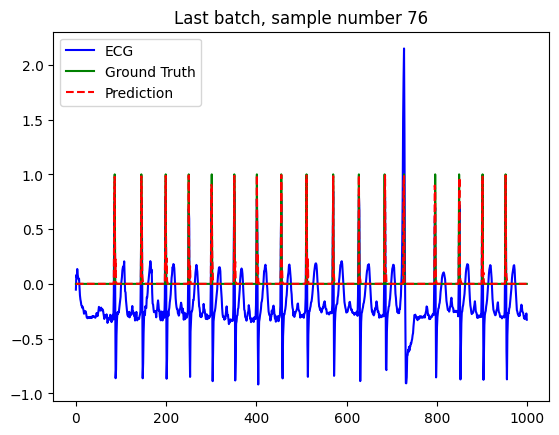

100%|██████████| 119/119 [02:14<00:00,  1.13s/it]



Train Loss: 0.0823
train Weighted Accuracy: 0.98911
train F1 Score: 0.92960
train TPR: 0.97986
train FPR: 0.00165
train TNR: 0.99835
train FNR: 0.02014



100%|██████████| 20/20 [00:04<00:00,  4.94it/s]



Validation Loss: 0.0815
validation Weighted Accuracy: 0.99017
validation F1 Score: 0.93034
validation TPR: 0.98198
validation FPR: 0.00165
validation TNR: 0.99835
validation FNR: 0.01802

====Epoch [47/50]====


 99%|█████████▉| 118/119 [02:31<00:01,  1.08s/it]

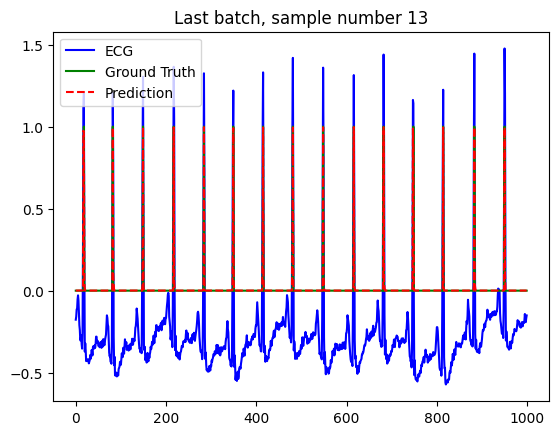

100%|██████████| 119/119 [02:32<00:00,  1.28s/it]



Train Loss: 0.0817
train Weighted Accuracy: 0.98919
train F1 Score: 0.93067
train TPR: 0.98001
train FPR: 0.00162
train TNR: 0.99838
train FNR: 0.01999



100%|██████████| 20/20 [00:04<00:00,  4.84it/s]



Validation Loss: 0.0810
validation Weighted Accuracy: 0.99034
validation F1 Score: 0.93112
validation TPR: 0.98230
validation FPR: 0.00163
validation TNR: 0.99837
validation FNR: 0.01770

====Epoch [48/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

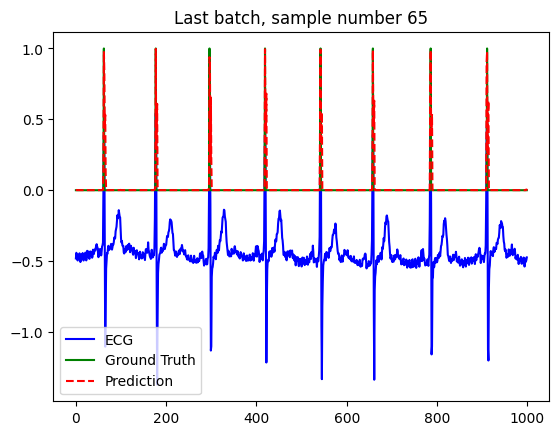

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0811
train Weighted Accuracy: 0.98932
train F1 Score: 0.93091
train TPR: 0.98026
train FPR: 0.00161
train TNR: 0.99839
train FNR: 0.01974



100%|██████████| 20/20 [00:03<00:00,  5.03it/s]



Validation Loss: 0.0804
validation Weighted Accuracy: 0.99029
validation F1 Score: 0.93198
validation TPR: 0.98218
validation FPR: 0.00160
validation TNR: 0.99840
validation FNR: 0.01782

====Epoch [49/50]====


 99%|█████████▉| 118/119 [02:07<00:01,  1.07s/it]

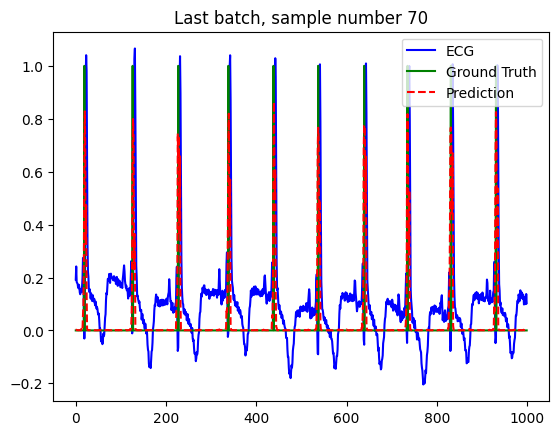

100%|██████████| 119/119 [02:08<00:00,  1.08s/it]



Train Loss: 0.0807
train Weighted Accuracy: 0.98948
train F1 Score: 0.93177
train TPR: 0.98055
train FPR: 0.00159
train TNR: 0.99841
train FNR: 0.01945



100%|██████████| 20/20 [00:03<00:00,  5.11it/s]



Validation Loss: 0.0799
validation Weighted Accuracy: 0.99019
validation F1 Score: 0.93346
validation TPR: 0.98194
validation FPR: 0.00156
validation TNR: 0.99844
validation FNR: 0.01806

====Epoch [50/50]====


 99%|█████████▉| 118/119 [02:08<00:01,  1.09s/it]

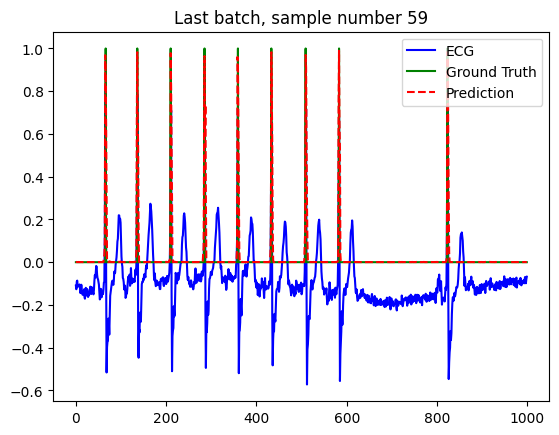

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.0801
train Weighted Accuracy: 0.98960
train F1 Score: 0.93254
train TPR: 0.98078
train FPR: 0.00157
train TNR: 0.99843
train FNR: 0.01922



100%|██████████| 20/20 [00:04<00:00,  4.98it/s]



Validation Loss: 0.0794
validation Weighted Accuracy: 0.99035
validation F1 Score: 0.93316
validation TPR: 0.98226
validation FPR: 0.00157
validation TNR: 0.99843
validation FNR: 0.01774



In [8]:
model.train_model(x_train=x_train, y_train=y_train, epochs=epochs, batch_size=batch_size, x_val=x_val, y_val=y_val)

In [24]:
model.test_model(x_test, y_test)

  0%|          | 0/396 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
100%|██████████| 396/396 [00:22<00:00, 17.82it/s]



Test Loss: 0.0804
test Weighted Accuracy: 0.98960
test F1 Score: 0.93357
test TPR: 0.98075
test FPR: 0.00154
test TNR: 0.99846
test FNR: 0.01925



In [29]:
import pickle
with open("./metrics/raw/TNET.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

In [30]:
with open("./metrics/raw/TNET.pkl", "rb") as f:
  metrics = pickle.load(f)

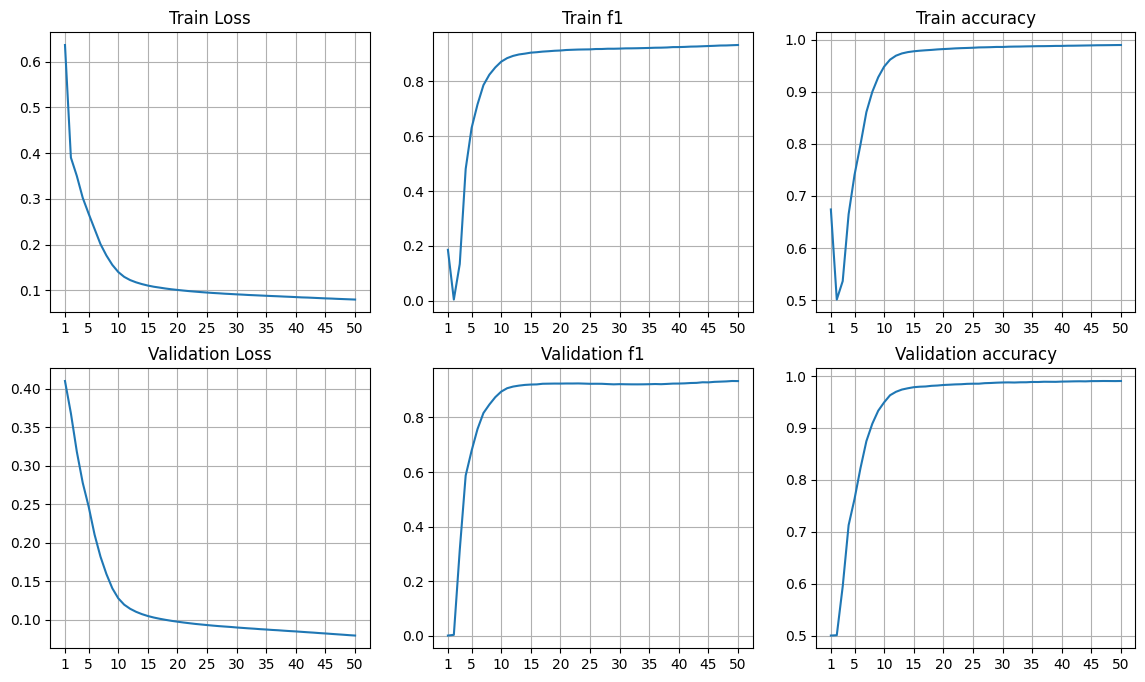

In [31]:
plot_metrics(metrics)

In [32]:
print_metrics(metrics, "all", 49)


Metrics for phase 'train' at index 49:
Loss: 0.08013
F1: 0.93254
Accuracy: 0.9896
Tpr: 0.98078
Tnr: 0.99843
Fpr: 0.00157
Fnr: 0.01922

Metrics for phase 'validation' at index 49:
Loss: 0.07937
F1: 0.93316
Accuracy: 0.99035
Tpr: 0.98226
Tnr: 0.99843
Fpr: 0.00157
Fnr: 0.01774

Metrics for phase 'test' at index -1:
Loss: 0.08037
F1: 0.93357
Accuracy: 0.9896
Tpr: 0.98075
Tnr: 0.99846
Fpr: 0.00154
Fnr: 0.01925


## Test with Fantasia dataset

In [39]:
batch_size = 100
input_dim = 32
seq_length = 1000
num_layers = 2
num_heads = 4
dim_feedforward = 32
dropout = 0.2

transformer = SimpleTransformerModel(input_dim, seq_length, num_layers, num_heads, dim_feedforward, dropout)
transformer.load_state_dict(torch.load(".\\checkpoints\\TNET\\TNET_epoch_50_acc_98.80_f1_0.93.pt"))

raw_transformer = SimpleTransformerModel(input_dim, seq_length, num_layers, num_heads, dim_feedforward, dropout) # trained on raw ECGS but still downsampled due to o(n^2) complexity
raw_transformer.load_state_dict(torch.load(".\\checkpoints\\TNET\\raw_ecgs\\TNET_epoch_50_acc_98.96_f1_0.93.pt"))

x = np.load(fantasia_path + "\\preprocessed\\downsampled\\x.npy")
y = np.load(fantasia_path + "\\preprocessed\\downsampled\\y.npy")

x_raw = np.load(fantasia_path + "\\preprocessed\\raw\\downsampled\\x.npy")
y_raw = np.load(fantasia_path + "\\preprocessed\\raw\\downsampled\\y.npy")


x = np.expand_dims(x, 2)
y = np.expand_dims(y, 2)

x_raw =  np.expand_dims(x_raw, 2)
y_raw = np.expand_dims(y_raw, 2)

Training will be performed with: cuda:0
Training will be performed with: cuda:0


C:\Users\patry\AppData\Local\Temp\ipykernel_13864\2119256752.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  transformer.load_state_dict(torch.load(".\\checkpoints\\TNE

In [43]:
from torch.utils.data import DataLoader
from models.datasets import ECGDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def test_model(model, x_test, y_test, plot=False):
    test_dataset = ECGDataset(x_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
    
    running_loss = 0.0
    num_r_peaks = 0.0
    num_correct = 0.0

    all_outputs = []
    all_labels = []
    
    model.eval()
    with torch.no_grad():
        for i, (x_test, y_test) in tqdm(enumerate(test_loader), total=len(test_loader)):
            x, y = x_test.to(device), y_test.to(device)
            outputs = model(x)

            loss = model.criterion(outputs, y)
            running_loss += loss.item()

            outputs = outputs.cpu().detach().numpy()
            y = y.cpu().detach().numpy()

            num_r_peaks += np.where(y == 1)[0].shape[0]
            num_correct += np.where((outputs > 0.5) & (y == 1))[0].shape[0]

            all_outputs.extend(outputs.flatten())
            all_labels.extend(y.flatten())

            if plot and (i % int((len(test_loader) / 10)) == 0):
                ecg = x[0].cpu().detach().numpy().flatten()
                gt = y[0].flatten()
                pred = outputs[0].flatten()

                fig, axs = plt.subplots(nrows=2)
                ax = axs[0]
                ax.plot(ecg)
                ax.grid()
                ax.legend(["ECG"])

                ax = axs[1]
                ax.plot(gt)
                ax.plot(pred)
                ax.grid()
                ax.legend(["Ground Truth", "Prediction"])

                fig.set_size_inches(6,4)
                plt.show()
            
    all_outputs = np.array(all_outputs)
    all_labels = np.array(all_labels)
    y_pred_binary = (all_outputs > 0.5).astype(int)
    test_loss = running_loss / len(test_loader)
    print(f"\nTest Loss: {test_loss:.4f}")
    model.calculate_metrics(test_loss, all_labels, y_pred_binary, "test")
    

  0%|          | 0/2774 [00:00<?, ?it/s]

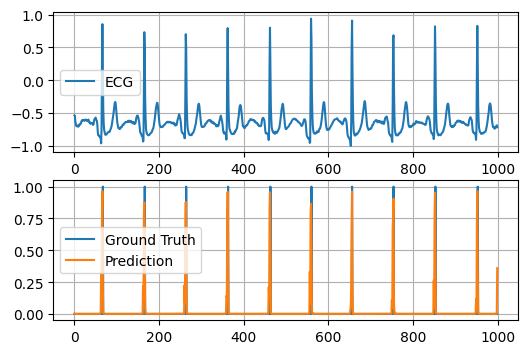

 10%|▉         | 274/2774 [00:06<00:55, 45.03it/s]

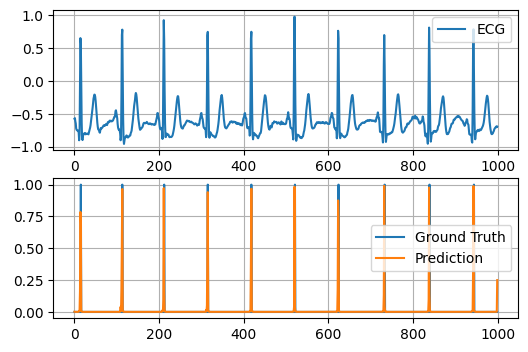

 20%|█▉        | 553/2774 [00:13<00:49, 44.58it/s]

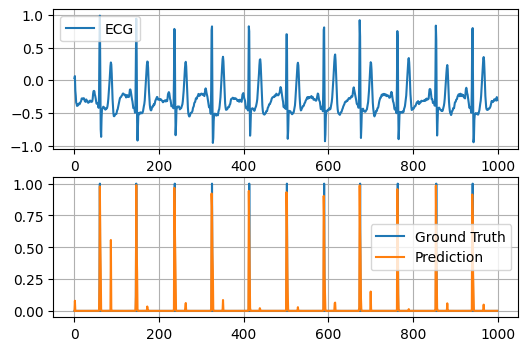

 30%|██▉       | 828/2774 [00:19<00:44, 44.04it/s]

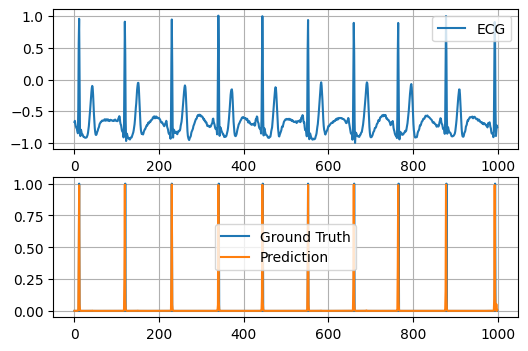

 40%|███▉      | 1108/2774 [00:25<00:36, 46.14it/s]

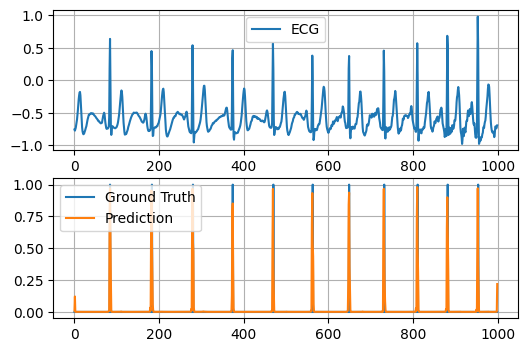

 50%|████▉     | 1383/2774 [00:32<00:29, 46.60it/s]

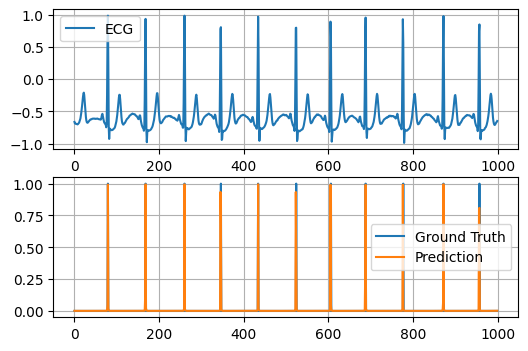

 60%|█████▉    | 1658/2774 [00:38<00:23, 46.96it/s]

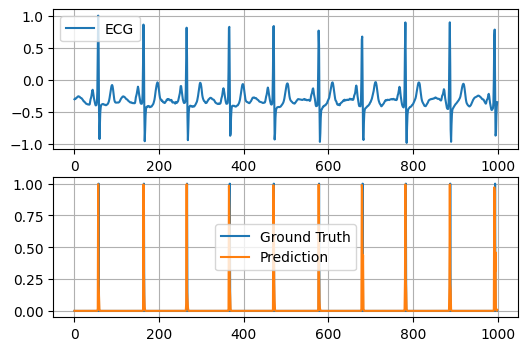

 70%|██████▉   | 1938/2774 [00:44<00:17, 46.65it/s]

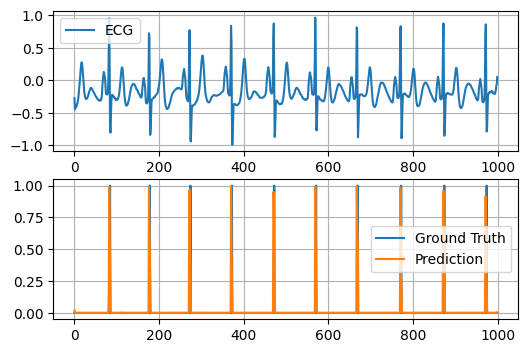

 80%|███████▉  | 2213/2774 [00:50<00:12, 45.90it/s]

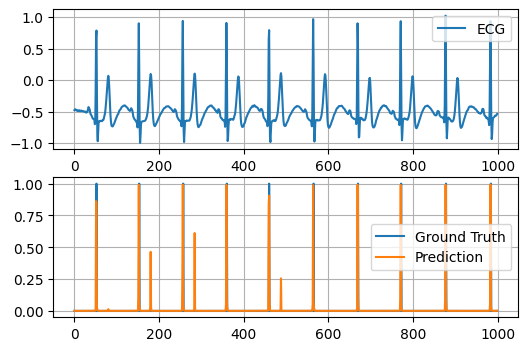

 90%|████████▉ | 2493/2774 [00:57<00:06, 46.58it/s]

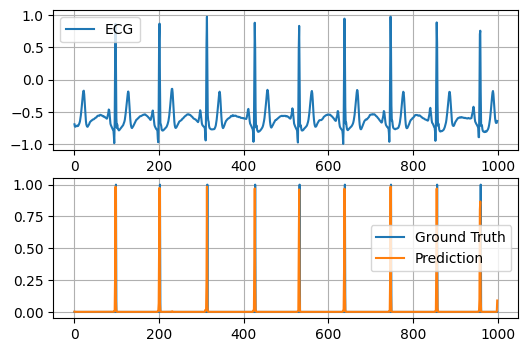

100%|█████████▉| 2768/2774 [01:03<00:00, 46.78it/s]

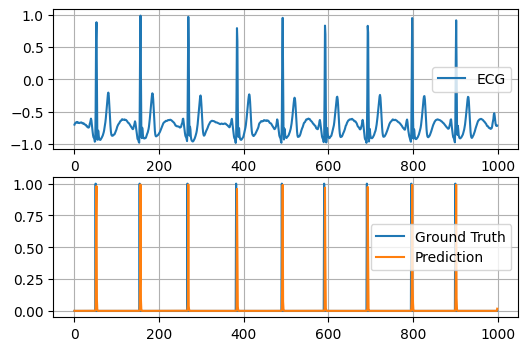

100%|██████████| 2774/2774 [01:03<00:00, 43.62it/s]



Test Loss: 0.2001
test Weighted Accuracy: 0.99922
test F1 Score: 0.97991
test TPR: 0.99885
test FPR: 0.00040
test TNR: 0.99960
test FNR: 0.00115



In [44]:
test_model(transformer, x, y, True)

  0%|          | 0/2774 [00:00<?, ?it/s]

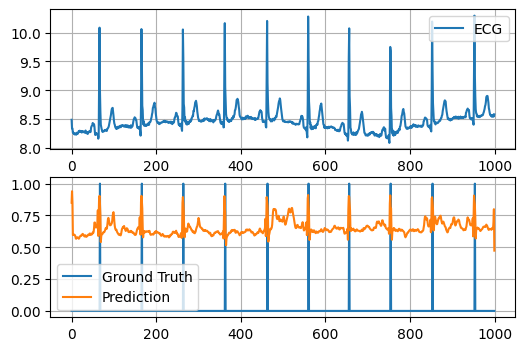

 10%|▉         | 275/2774 [00:06<00:53, 46.72it/s]

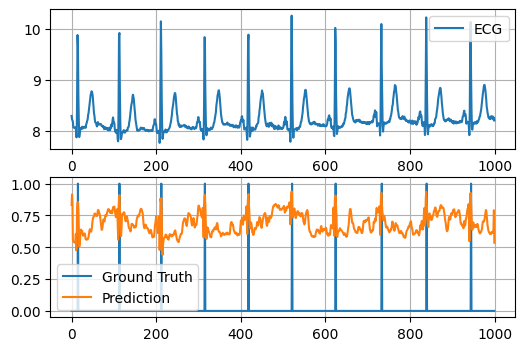

 20%|█▉        | 550/2774 [00:13<00:47, 46.38it/s]

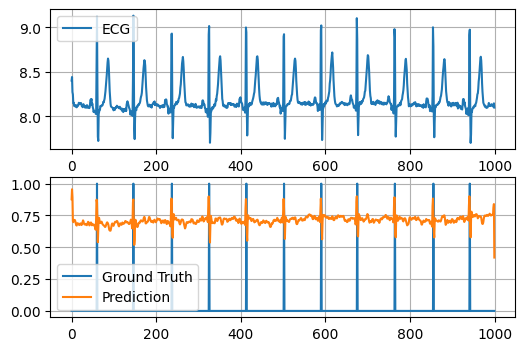

 30%|██▉       | 830/2774 [00:19<00:42, 45.50it/s]

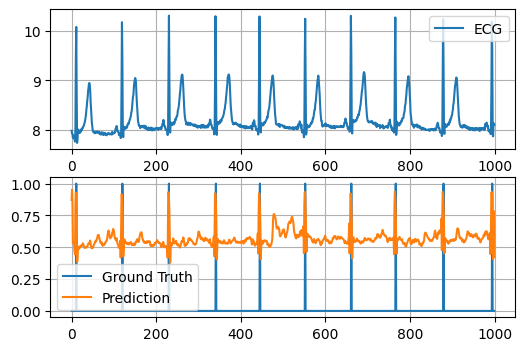

 40%|███▉      | 1105/2774 [00:25<00:35, 47.11it/s]

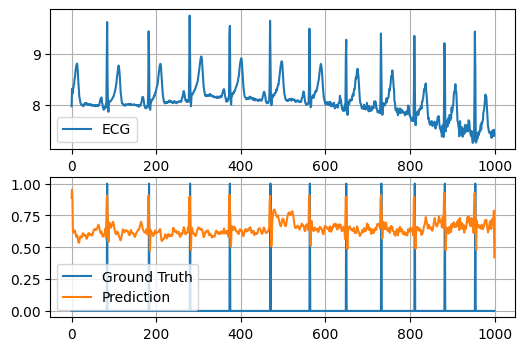

 50%|████▉     | 1385/2774 [00:31<00:29, 47.23it/s]

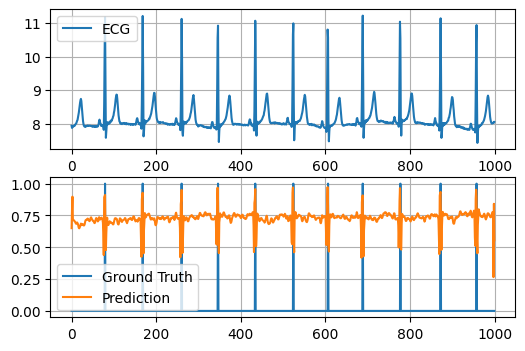

 60%|█████▉    | 1660/2774 [00:38<00:23, 47.04it/s]

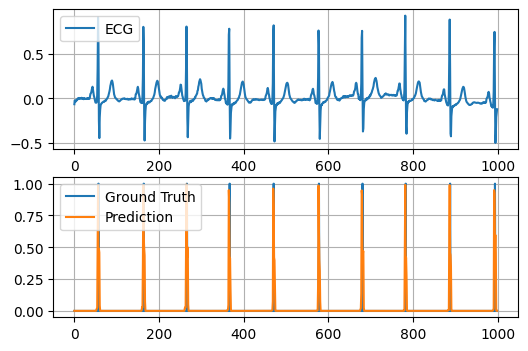

 70%|██████▉   | 1935/2774 [00:44<00:18, 46.25it/s]

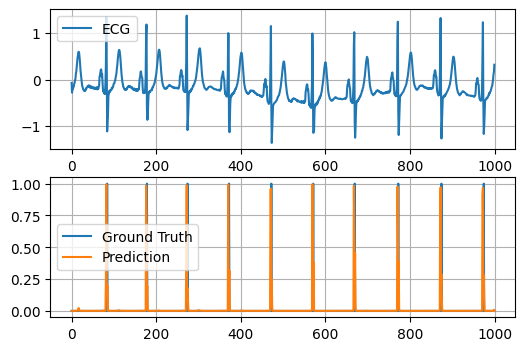

 80%|███████▉  | 2215/2774 [00:50<00:12, 46.36it/s]

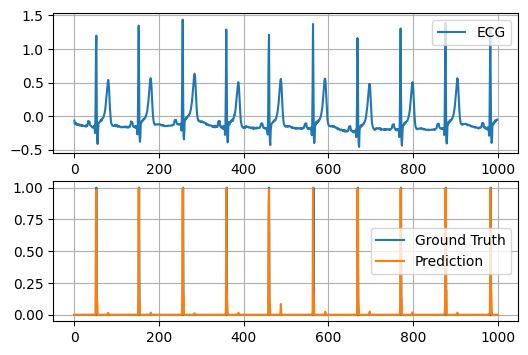

 90%|████████▉ | 2490/2774 [00:57<00:06, 45.48it/s]

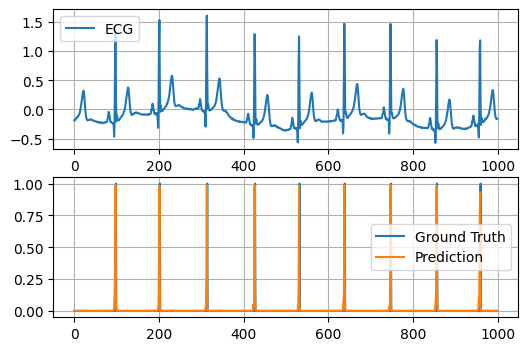

100%|█████████▉| 2770/2774 [01:03<00:00, 45.98it/s]

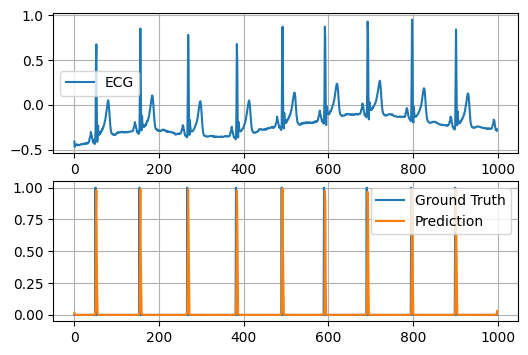

100%|██████████| 2774/2774 [01:04<00:00, 43.34it/s]



Test Loss: 0.6814
test Weighted Accuracy: 0.84567
test F1 Score: 0.62897
test TPR: 0.69659
test FPR: 0.00525
test TNR: 0.99475
test FNR: 0.30341



In [45]:
test_model(raw_transformer, x_raw, y_raw, True)